In [2]:

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as web

# For time stamps
from datetime import datetime



In [3]:

# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN'] 
#MAKE SURE THERE IS NO SPECIAL SYMBOL IN THE NAME

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    if stock =='BTC-USD':
        globals()['BTC'] = web.DataReader(stock,'yahoo',start,end)
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)
   
    


In [4]:

# Summary Stats


In [6]:
AMZN.info()
AMZN.describe()
AMZN['Volume'].describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-11-28 to 2019-11-27
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


count    2.520000e+02
mean     4.286601e+06
std      2.010281e+06
min      1.690300e+06
25%      2.890975e+06
50%      3.685500e+06
75%      4.998750e+06
max      1.364030e+07
Name: Volume, dtype: float64

In [31]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2018-11-27 to 2019-11-27
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


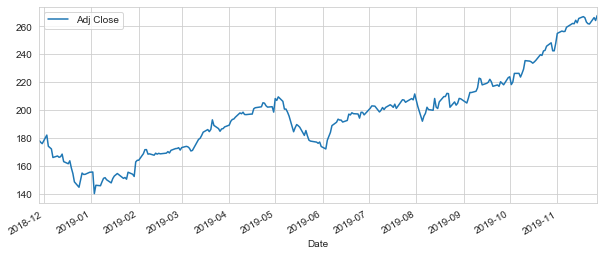

In [8]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))


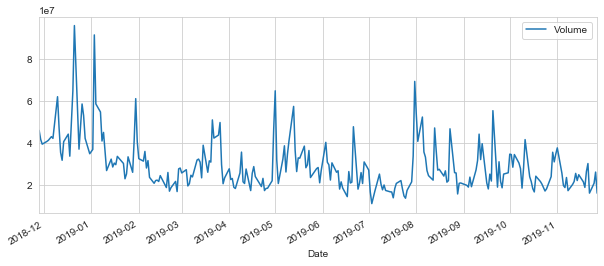

In [9]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [10]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

<bound method NDFrame.describe of              Adj Close  MA for 10 days  MA for 20 days  MA for 50 days
Date                                                                  
2018-11-28  178.261627             NaN             NaN             NaN
2018-11-29  176.892197             NaN             NaN             NaN
2018-11-30  175.936554             NaN             NaN             NaN
2018-12-03  182.084183             NaN             NaN             NaN
2018-12-04  174.074539             NaN             NaN             NaN
...                ...             ...             ...             ...
2019-11-21  262.010010      263.576007      257.352966      238.964209
2019-11-22  261.779999      263.740005      258.149870      239.837904
2019-11-25  266.369995      264.157004      259.053143      240.780469
2019-11-26  264.290009      264.390005      260.139556      241.665481
2019-11-27  267.839996      264.727005      261.404964      242.580217

[252 rows x 4 columns]>

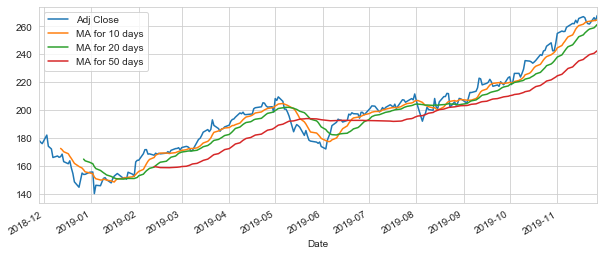

In [13]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].describe

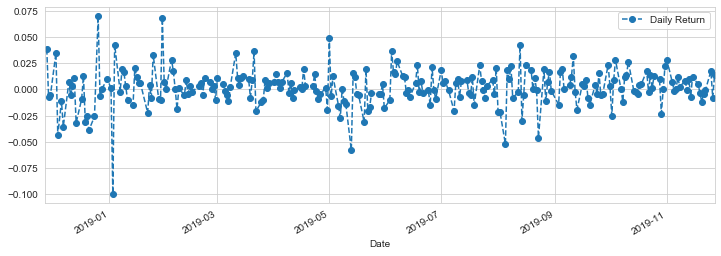

In [36]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

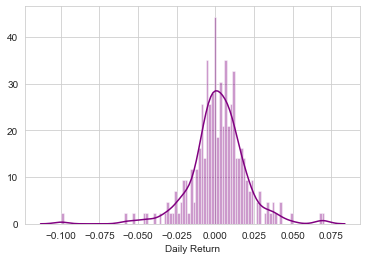

In [37]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#AAPL['Daily Return'].hist()

In [39]:

tech = web.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
btc = web.DataReader(['BTC-USD'],'yahoo',start,end)['Adj Close']
closing_df = pd.merge(tech, btc, left_index=True, right_index=True).rename(columns={'Adj Close': 'BTC'})

In [40]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()


In [41]:
import scipy.stats as stats

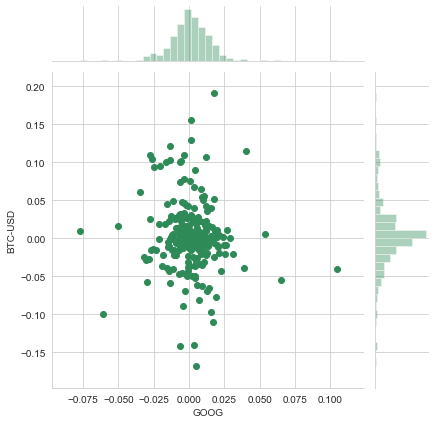

In [43]:
# Comparing Google to itself should show a perfectly linear relationship
j = sns.jointplot('GOOG','BTC-USD',tech_rets,kind='scatter',color='seagreen')

C:\Users\supaw\Anaconda3.0\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


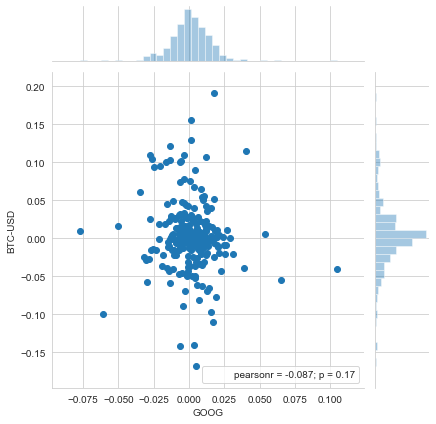

In [44]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
j = sns.jointplot('GOOG','BTC-USD',tech_rets,kind='scatter')
j.annotate(stats.pearsonr)
plt.show()

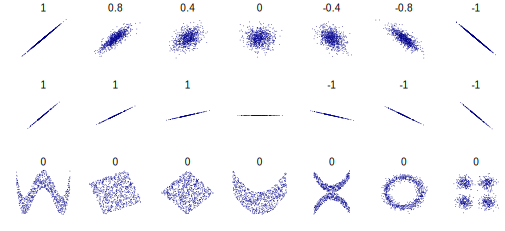

In [45]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

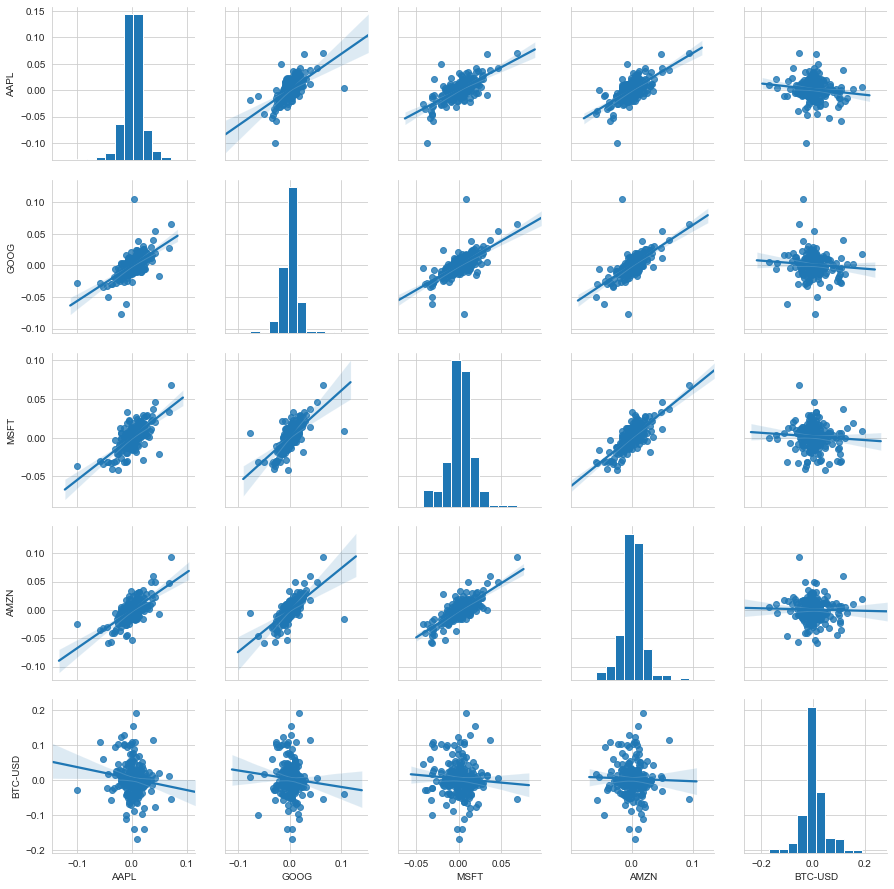

In [46]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna(),kind='reg') #fit linear regression models to the scatter plots

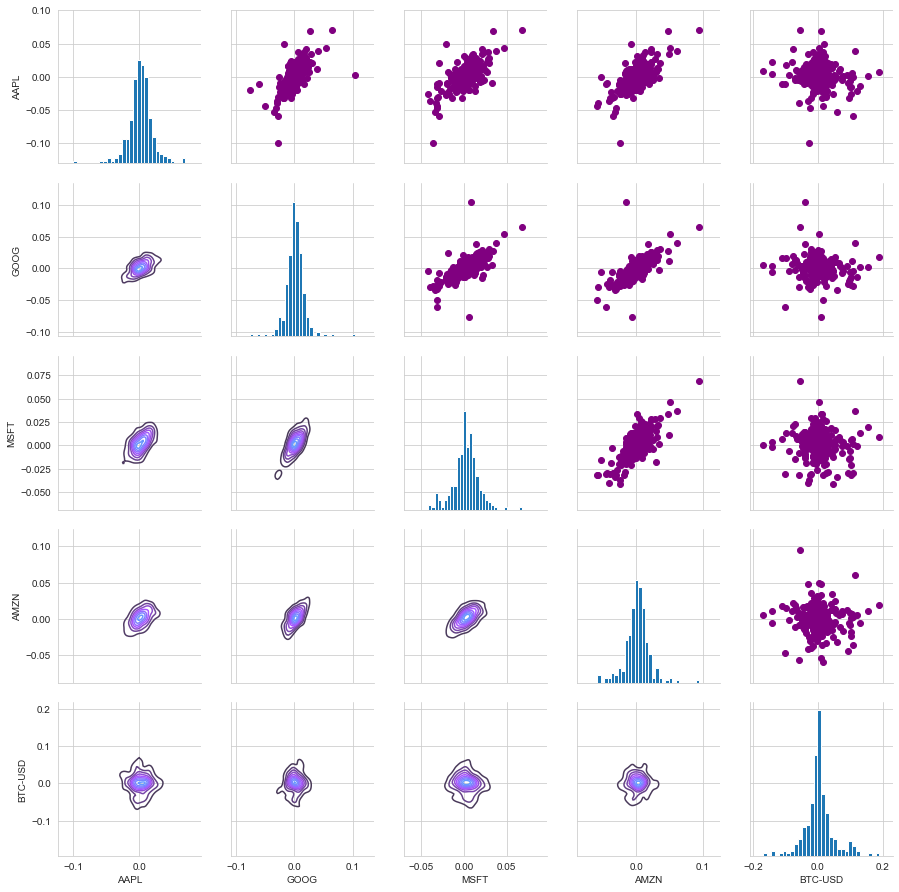

In [47]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

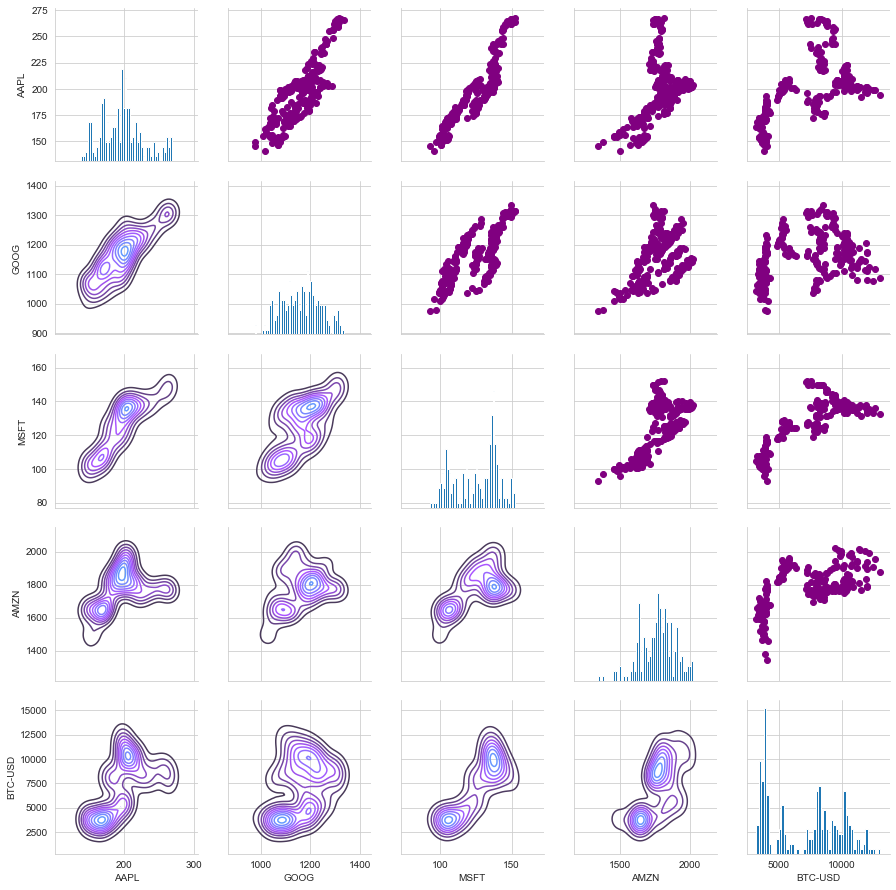

In [48]:

# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=50)

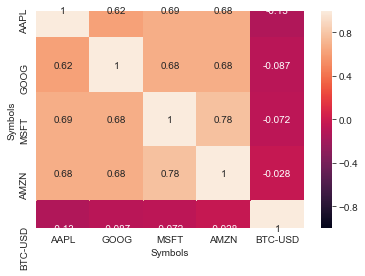

In [49]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.dropna().corr(),annot=True,vmin =-1,vmax=1)

In [50]:
print(tech_rets.dropna().corr())

Symbols      AAPL      GOOG      MSFT      AMZN   BTC-USD
Symbols                                                  
AAPL     1.000000  0.617264  0.686687  0.680219 -0.132566
GOOG     0.617264  1.000000  0.681246  0.683537 -0.086642
MSFT     0.686687  0.681246  1.000000  0.779989 -0.072478
AMZN     0.680219  0.683537  0.779989  1.000000 -0.028133
BTC-USD -0.132566 -0.086642 -0.072478 -0.028133  1.000000


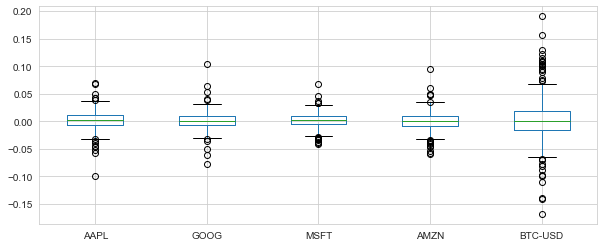

In [62]:
tech_rets.boxplot(figsize = (10,4))

In [57]:
tech_rets.show(figsize = (10,4))


AttributeError: 'DataFrame' object has no attribute 'show'

In [59]:
tech_rets.describe()

Symbols,AAPL,GOOG,MSFT,AMZN,BTC-USD
count,252.000000,252.000000,252.000000,252.000000,252.000000
mean,0.001932,0.001045,0.001562,0.000714,0.003693
std,0.018153,0.016591,0.014622,0.017894,0.044941
min,-0.099607,-0.076966,-0.041739,-0.058656,-0.168072
25%,-0.005938,-0.006473,-0.005520,-0.007631,-0.015143
50%,0.001775,0.000714,0.001549,0.001354,0.001394
75%,0.011267,0.009425,0.009516,0.009592,0.018646
max,0.070422,0.104485,0.068310,0.094452,0.190686


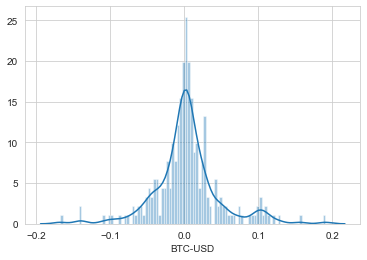

In [61]:
sns.distplot(tech_rets['BTC-USD'].dropna(),bins =100)

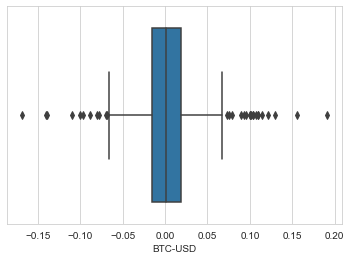

In [64]:
sns.boxplot(tech_rets['BTC-USD'])